# Exploratory Data Analysis

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Pertama-tama mari kita import library yang akan kita gunakan. Kali ini, kita akan menggunakan library Pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mari buka file CSV yang akan di eksplor. Kali ini, kita akan mengeksplor dataset Pokemon.

In [3]:
df = pd.read_csv('dataset/Pokemon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.drop('#', axis = 1, inplace = True)
df.drop('Generation', axis = 1, inplace = True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False


In [5]:
df.loc[:,'Name'] = df.loc[:,'Name'].str.replace(r'\w*Mega', 'Mega', regex = True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,False


In [6]:
df.shape

(800, 11)

In [7]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [8]:
df.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

### Correlation

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Total,1,0.618748,0.736211,0.612787,0.74725,0.717609,0.575943,0.501758
HP,0.618748,1,0.422386,0.239622,0.36238,0.378718,0.175952,0.27362
Attack,0.736211,0.422386,1,0.438687,0.396362,0.26399,0.38124,0.345408
Defense,0.612787,0.239622,0.438687,1,0.223549,0.510747,0.0152266,0.246377
Sp. Atk,0.74725,0.36238,0.396362,0.223549,1,0.506121,0.473018,0.448907
Sp. Def,0.717609,0.378718,0.26399,0.510747,0.506121,1,0.259133,0.363937
Speed,0.575943,0.175952,0.38124,0.0152266,0.473018,0.259133,1,0.326715
Legendary,0.501758,0.27362,0.345408,0.246377,0.448907,0.363937,0.326715,1


Dari correlation matrix diatas kita dapat menyimpulkan beberapa hal:
1. Kolom Legendary memiliki korelasi tertinggi terhadap Total dan terrendah terhadap Defense

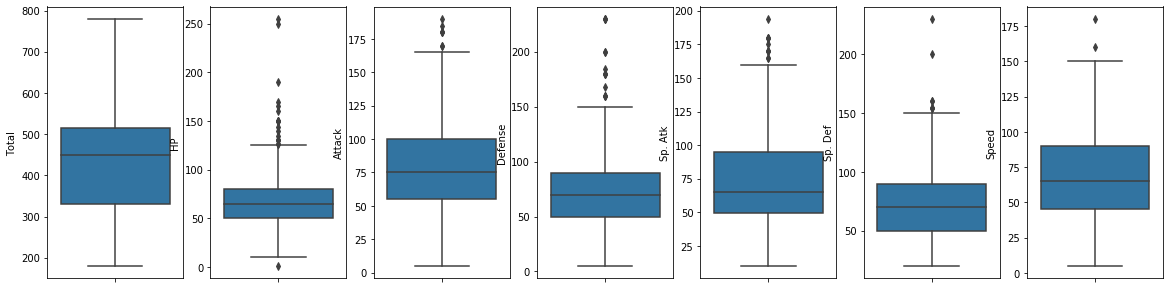

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(20,5))
sns.boxplot(y = df['Total'], ax = ax[0])
sns.boxplot(y = df['HP'], ax = ax[1])
sns.boxplot(y = df['Attack'], ax = ax[2])
sns.boxplot(y = df['Defense'], ax = ax[3])
sns.boxplot(y = df['Sp. Atk'], ax = ax[4])
sns.boxplot(y = df['Sp. Def'], ax = ax[5])
sns.boxplot(y = df['Speed'], ax = ax[6])